In [1]:
import sys
sys.path.insert(0, '../code/')
from dismod_db import DismodDB
from two_level import TwoLevel
from plot_two_level import PlotTwoLevel
import numpy as np
import pandas as pd
from dismod_output import DismodOutput

#### Build database

In [7]:
data = pd.read_csv('./data/diabetes_sinc_complete_loc.csv')
integrand = ['Sincidence']
locations = ['Hong Kong Special Administrative Region of China', 'Beijing']
location_name_to_id = {}
for i, row in data[data['location_name'].isin(locations)].iterrows():
    location_name_to_id[row['location_name']] = row['location_id']
    if len(location_name_to_id) == len(locations):
        break
data = data[data['location_name'].isin(locations)].copy()
data.reset_index(inplace=True, drop=True)
for i, row in data.iterrows():
    if row['location_name'] == 'Hong Kong Special Administrative Region of China':
        data.loc[i, 'location_name'] = 'Hong Kong'
locations = ['Beijing', 'Hong Kong']

In [8]:
rates = ['iota']
#meas_noise_density = {'Sincidence':{'density':'students', 'nu': 30}}
meas_noise_density = {'Sincidence': {'density': 'gaussian'}}
rates_parent_priors = [
    # rate priors for iota
    ({'density':'uniform','upper':1.0,'lower':1e-16,'mean': .0001},\
    {'density': 'gaussian', 'mean':0.0, 'std': 1e-3},\
    {'density': 'gaussian', 'mean':0.0, 'std': 1e-3})]
rates_child_priors = [
    # rate priors for iota
    ({'density':'gaussian','mean': 0.0, 'std': 5}, None, None)]
#---------change path------------
path_to_db = './data/incidence_two_level_hkbj.db'

db = DismodDB(data, locations, integrand,rates, rates_parent_priors, 
              rates_child_priors, meas_noise_density,path_to_db)

#### Train model

In [9]:
model = TwoLevel(db)

In [10]:
model.fit_both(tol=1e-12)

/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level_hkbj.db init
./data/incidence_two_level_hkbj.db fit fixed
./data/incidence_two_level_hkbj.db predict fit_var
./data/incidence_two_level_hkbj.db set start_var fit_var
./data/incidence_two_level_hkbj.db fit both
./data/incidence_two_level_hkbj.db predict fit_var


locations: all
measurements: all
groups: all


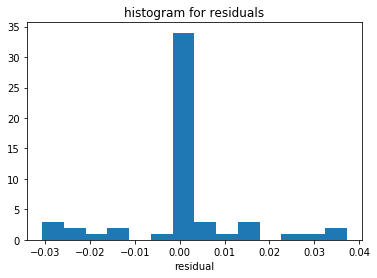

In [2]:
path = './data/'
plt = PlotTwoLevel(path, 'incidence_two_level_hkbj.db')
plt.plot_residuals()

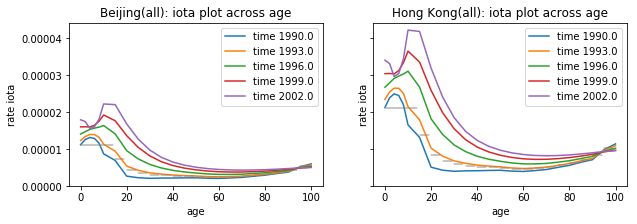

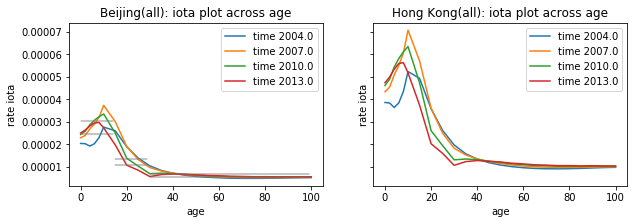

In [3]:
plt.plot_change_over_age('rate', 'iota', 'Sincidence', ['Beijing', 'Hong Kong'], plot_data=True)

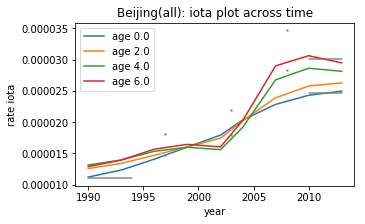

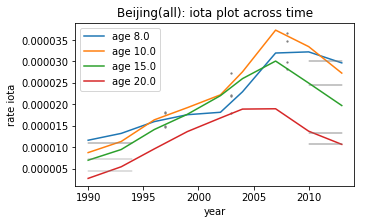

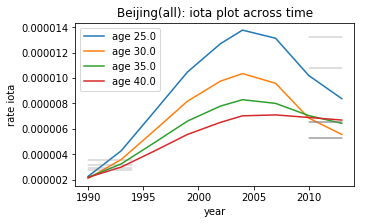

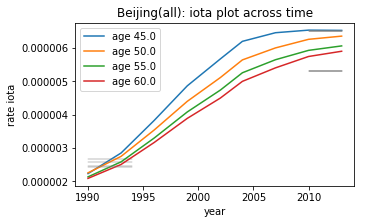

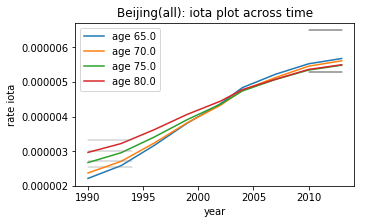

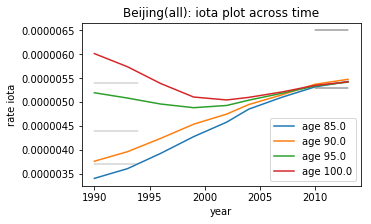

In [4]:
plt.plot_change_over_time('rate', 'iota', 'Sincidence', ['Beijing'], curve_per_plot=4)

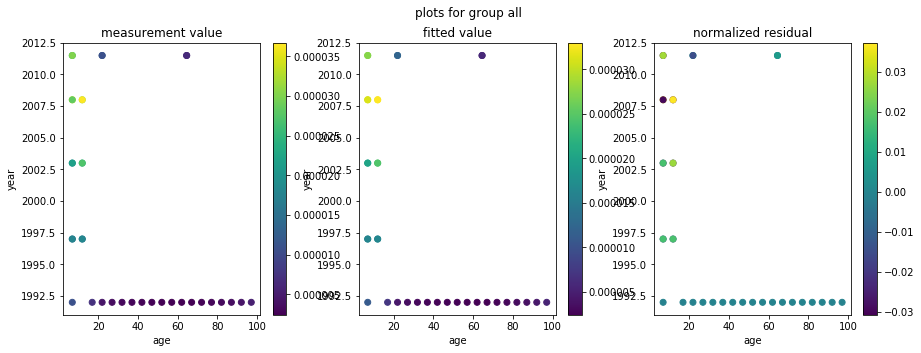

In [5]:
plt.plot_data_direct('Beijing', 'Sincidence')